## 4- Classification - Income Classification

In [1]:
from  sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('income_evaluation.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.corr(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<Axes: >

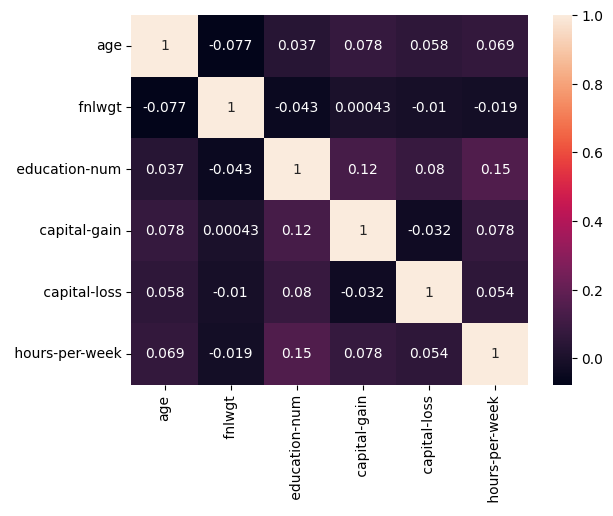

In [7]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [8]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
#remove the spaces in the column names
df.columns = df.columns.str.strip()


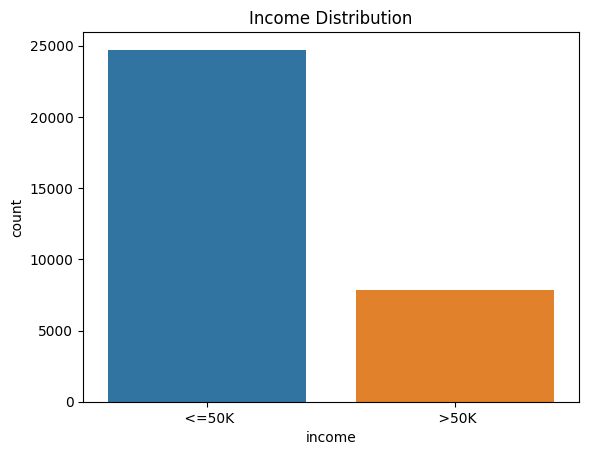

In [11]:
# Bar chart for income distribution
sns.countplot(data=df, x='income')
plt.title('Income Distribution')
plt.show()

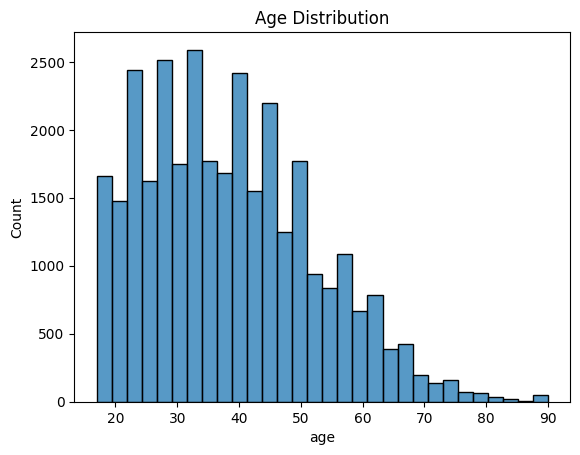

In [12]:
# Histogram for age distribution
sns.histplot(data=df, x='age', bins=30)
plt.title('Age Distribution')
plt.show()

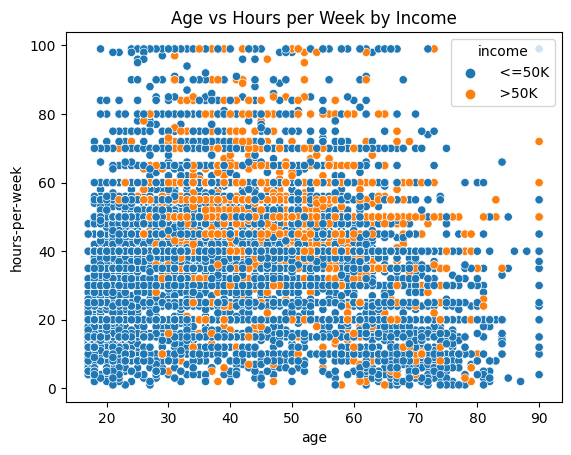

In [13]:
# Scatter plot of age vs hours per week, colored by income
sns.scatterplot(data=df, x='age', y='hours-per-week', hue='income')
plt.title('Age vs Hours per Week by Income')
plt.show()

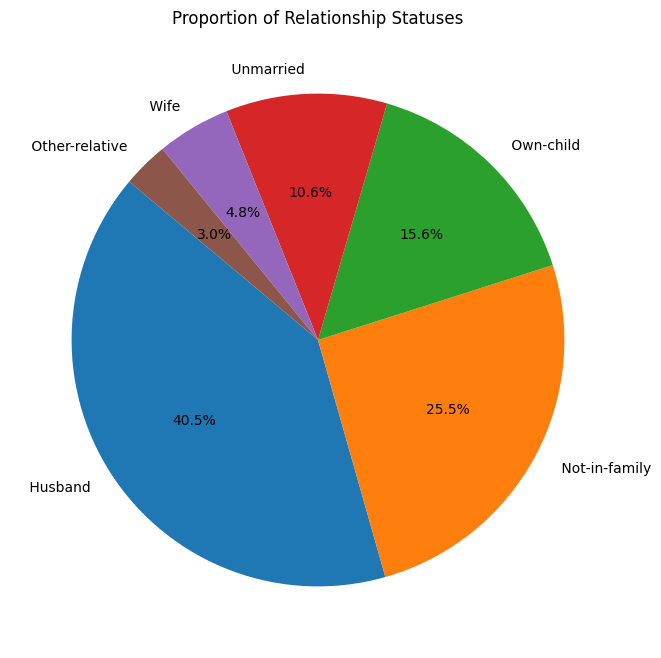

In [14]:
# Pie chart for proportion of relationship statuses
relationship_counts = df['relationship'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(relationship_counts, labels=relationship_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Relationship Statuses')
plt.show()

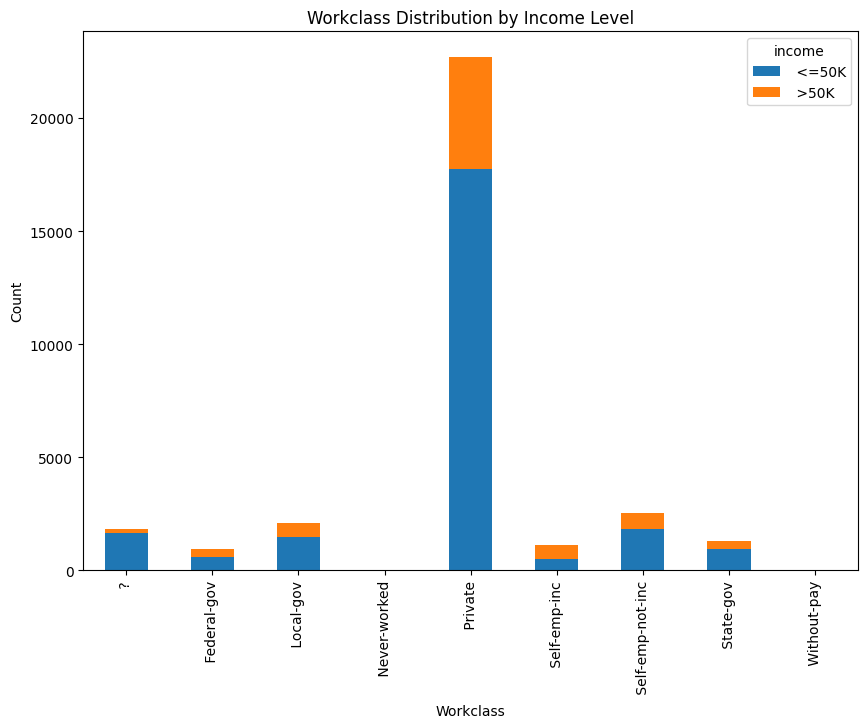

In [15]:
# Stacked bar chart for workclass distribution by income level
workclass_income = df.groupby(['workclass', 'income']).size().unstack().fillna(0)
workclass_income.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Workclass Distribution by Income Level')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

In [16]:
df['income'].value_counts()

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [17]:
df['income'] = df['income'].str.strip()


In [18]:
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)


In [19]:
df.income.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [20]:
x=df.drop('income',axis=1)

In [21]:
y=df['income']

In [22]:
x=pd.get_dummies(x,drop_first=True)

In [23]:
model_classification(x,y)

Model:  GaussianNB()
Model Accuracy:  0.7992629747159382
Model Confusion Matrix:  [[7081 1587]
 [ 374  727]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.95      0.82      0.88      8668
           1       0.31      0.66      0.43      1101

    accuracy                           0.80      9769
   macro avg       0.63      0.74      0.65      9769
weighted avg       0.88      0.80      0.83      9769

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.8019244549083837
Model Confusion Matrix:  [[6114  594]
 [1341 1720]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.82      0.91      0.86      6708
           1       0.74      0.56      0.64      3061

    accuracy                           0.80      9769
   macro avg       0.78      0.74      0.75      9769
weighted avg       0.80      0.80      0.79      9769

------------

(GradientBoostingClassifier(),
 0.8695874705701709,
 array([[6866, 1575],
        [ 589,  739]], dtype=int64))

In [24]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

def algo_classification(X, y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    # Split the dataset
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # List of models to evaluate
    models = [
        ("GaussianNB", GaussianNB()),
        ("BernoulliNB", BernoulliNB()),
        ("LogisticRegression", LogisticRegression(max_iter=10000)),
        ("RandomForestClassifier", RandomForestClassifier()),
        ("GradientBoostingClassifier", GradientBoostingClassifier()),
        ("KNeighborsClassifier", KNeighborsClassifier(n_neighbors=5))
    ]
    
    results = []
    
    for name, model in models:
        model.fit(x_train, y_train)
        model_predict = model.predict(x_test)
        accuracy = accuracy_score(y_test, model_predict)
        conf_matrix = confusion_matrix(y_test, model_predict)
        class_report = classification_report(y_test, model_predict, output_dict=True)
        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Confusion Matrix": conf_matrix,
            "Classification Report": class_report
        })
    
    # Create a DataFrame from results and sort by accuracy
    results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
    
    # Print the results
    for idx, row in results_df.iterrows():
        print(f"Model: {row['Model']}")
        print(f"Accuracy: {row['Accuracy']}")
        print(f"Confusion Matrix:\n{row['Confusion Matrix']}")
        print(f"Classification Report:\n{pd.DataFrame(row['Classification Report']).transpose()}")
        print("-" * 50)
    
    best_model_name = results_df.iloc[0]["Model"]
    best_model_accuracy = results_df.iloc[0]["Accuracy"]
    best_conf_matrix = results_df.iloc[0]["Confusion Matrix"]
    
    print(f"Best Model: {best_model_name}")
    print(f"Best Model Accuracy: {best_model_accuracy}")
    
    return results_df, best_model_name, best_model_accuracy, best_conf_matrix

# Example usage
# df = pd.read_csv('data.csv')
# X = df.drop('income_binary', axis=1)  # Replace with appropriate feature columns
# y = df['income_binary']  # Target variable
# results_df, best_model_name, best_model_accuracy, best_conf_matrix = algo_classification(X, y)


In [25]:
results_df, best_model_name, best_model_accuracy, best_conf_matrix = algo_classification(x, y)

Model: GradientBoostingClassifier
Accuracy: 0.8695874705701709
Confusion Matrix:
[[7075  380]
 [ 894 1420]]
Classification Report:
              precision    recall  f1-score      support
0              0.887815  0.949027  0.917401  7455.000000
1              0.788889  0.613656  0.690326  2314.000000
accuracy       0.869587  0.869587  0.869587     0.869587
macro avg      0.838352  0.781342  0.803864  9769.000000
weighted avg   0.864382  0.869587  0.863614  9769.000000
--------------------------------------------------
Model: RandomForestClassifier
Accuracy: 0.8565871634763026
Confusion Matrix:
[[6919  536]
 [ 865 1449]]
Classification Report:
              precision    recall  f1-score      support
0              0.888875  0.928102  0.908065  7455.000000
1              0.729975  0.626188  0.674110  2314.000000
accuracy       0.856587  0.856587  0.856587     0.856587
macro avg      0.809425  0.777145  0.791088  9769.000000
weighted avg   0.851236  0.856587  0.852648  9769.000000
-------

In [26]:
results_df

,Model,Accuracy,Confusion Matrix,Classification Report
4,GradientBoostingClassifier,0.869587,"[[7075, 380], [894, 1420]]","{'0': {'precision': 0.8878152842263772, 'recal..."
3,RandomForestClassifier,0.856587,"[[6919, 536], [865, 1449]]","{'0': {'precision': 0.888874614594039, 'recall..."
2,LogisticRegression,0.850241,"[[6947, 508], [955, 1359]]","{'0': {'precision': 0.8791445203745887, 'recal..."
1,BernoulliNB,0.801924,"[[6114, 1341], [594, 1720]]","{'0': {'precision': 0.9114490161001789, 'recal..."
0,GaussianNB,0.799263,"[[7081, 374], [1587, 727]]","{'0': {'precision': 0.8169127826488233, 'recal..."
5,KNeighborsClassifier,0.778483,"[[6866, 589], [1575, 739]]","{'0': {'precision': 0.8134107333254353, 'recal..."


In [27]:
best_model_name

'GradientBoostingClassifier'

In [28]:
best_model_accuracy

0.8695874705701709

In [30]:
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

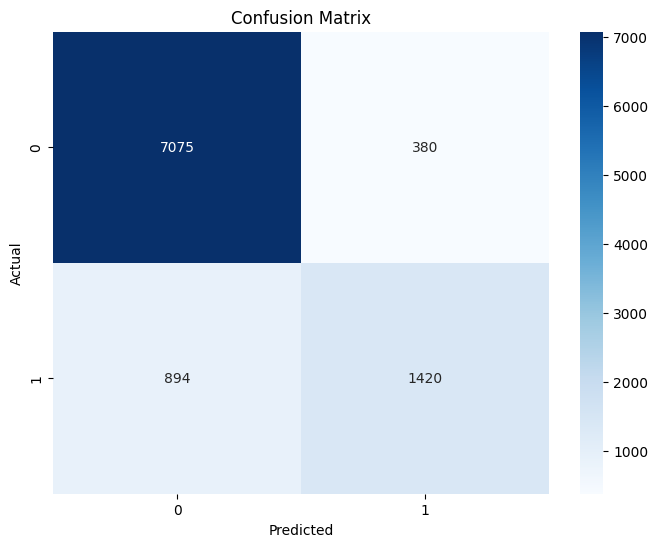

In [31]:
plot_confusion_matrix(best_conf_matrix)